In [1]:
import scipy
import numpy as np
import pandas as pd
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import Utils
import skseq

In [2]:
from Utils.assignment_2_functions import *

In [3]:
df_train = pd.read_csv("./data/train_data_ner.csv", encoding="latin1")
df_test  = pd.read_csv("./data/test_data_ner.csv", encoding="latin1")

In [4]:
corpus, word_to_pos, pos_to_word = get_corpus_and_word_dict(df_train,df_test)
tag_to_pos, pos_to_tag = get_tag_dict(df_train)


In [5]:
X_tr,Y_tr = get_X_Y(df_train)

In [6]:
X_ts,Y_ts = get_X_Y(df_test)

In [16]:
from skseq.sequences.label_dictionary import LabelDictionary
from skseq.sequences.sequence_list import SequenceList

tag_pos_dict = LabelDictionary(tag_to_pos.keys())
word_pos_dict = LabelDictionary(word_to_pos.keys())
train_seq = SequenceList(word_pos_dict, tag_pos_dict)
for x,y in zip(X_tr,Y_tr):
    train_seq.add_sequence(x, y, word_pos_dict, tag_pos_dict)

In [17]:
tag_pos_dict = LabelDictionary(tag_to_pos.keys())
word_pos_dict = LabelDictionary(word_to_pos.keys())
test_seq = SequenceList(word_pos_dict, tag_pos_dict)
for x,y in zip(X_ts,Y_ts):
    test_seq.add_sequence(x, y, word_pos_dict, tag_pos_dict)

In [18]:
from skseq.sequences import extended_feature

feature_mapper = skseq.sequences.id_feature.IDFeatures(train_seq)
feature_mapper.build_features()

feature_mapper2 = skseq.sequences.extended_feature.ExtendedFeatures(train_seq)
feature_mapper2.build_features()

In [39]:
import skseq.sequences.structured_perceptron as spc

sp_base = spc.StructuredPerceptron(word_pos_dict, tag_pos_dict, feature_mapper)
sp_base.load_model(dir="fitted_models/perceptron_base_15_epoch")

sp_feat = spc.StructuredPerceptron(word_pos_dict, tag_pos_dict, feature_mapper2)
sp_feat.load_model(dir="fitted_models/perceptron_extra_15_epoch")


In [40]:
hist_base = pd.read_csv('fitted_models/hist_base.csv', index_col=0)
hist_feat = pd.read_csv('fitted_models/hist_feat.csv', index_col=0)
#hist_feat2 = pd.read_csv('fitted_models/hist_feat2.csv', index_col=0)

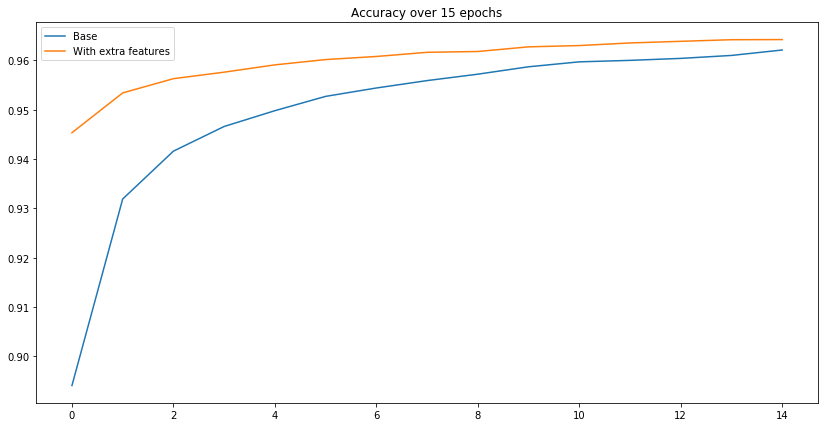

In [41]:
plt.figure(figsize=(14,7))
plt.plot(hist_base.index, hist_base.values,label='Base')
plt.plot(hist_feat.index, hist_feat.values, label='With extra features')
#plt.plot(hist_feat2.index, hist_feat.values, label='With extra features')

plt.title('Accuracy over {} epochs'.format(len(hist_base)), loc='center', pad=None)
plt.legend()


In [42]:
pred_train_base = sp_base.viterbi_decode_corpus(train_seq)
pred_test_base = sp_base.viterbi_decode_corpus(test_seq)
#accuracy_tot(train_seq, pred_train)

In [43]:
total_train_acc_base = accuracy_tot(train_seq, pred_train_base)
total_test_acc_base  = accuracy_tot(test_seq, pred_test_base)

print("For the base model the total train accuracy is {}.\n ..... \nThe test one is {}".format(total_train_acc_base,\
                                                                                          total_test_acc_base))

For the base model the total train accuracy is 0.9677542367326899.
 ..... 
The test one is 0.8739065062059691


In [44]:
train_acc_base_not_O = accuracy_not_O(train_seq, pred_train_base,tag_to_pos)
test_acc_base_not_O  = accuracy_not_O(test_seq, pred_test_base,tag_to_pos)

print("For the base model the train accuracy without considering '0' is {}.\n ..... \nThe test one is {}"\
                                                                                .format(train_acc_base_not_O,\
                                                                                          test_acc_base_not_O))

For the base model the train accuracy without considering '0' is 0.8180384908122214.
 ..... 
The test one is 0.2040114479112241


In [45]:
f1score_base_train, cm_base_train  = get_f1_score(train_seq, pred_train_base, pos_to_tag)
f1score_base_test,  cm_base_test   = get_f1_score(test_seq, pred_test_base, pos_to_tag)

print("For the base model the train f1_score is {}.\n ..... \nThe test one is {}"\
                                                                                .format(f1score_base_train,\
                                                                                          f1score_base_test))

For the base model the train f1_score is 0.9672318375920129.
 ..... 
The test one is 0.8418506166342375


Confusion matrix, without normalization


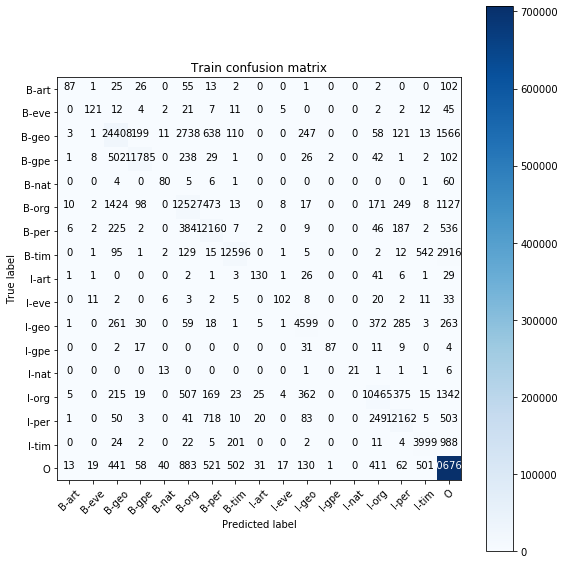

In [46]:
plot_confusion_matrix(cm_base_train, list(pos_to_tag.values()), normalize=False, title='Train confusion matrix')


Confusion matrix, without normalization


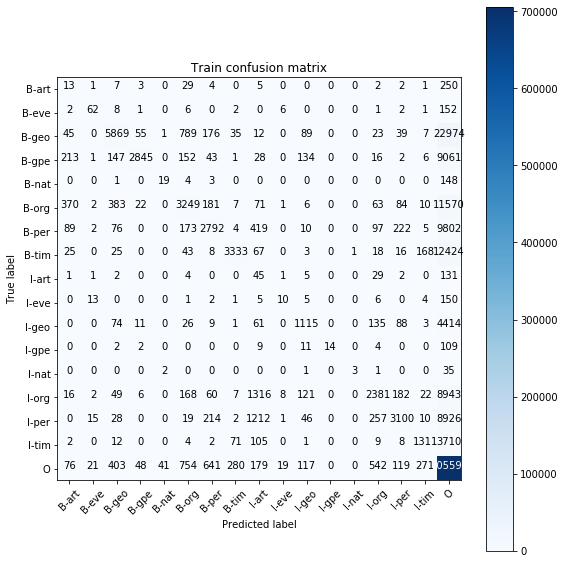

In [47]:
plot_confusion_matrix(cm_base_test, list(pos_to_tag.values()), normalize=False, title='Train confusion matrix')


In [48]:
pred_train_feat = sp_feat.viterbi_decode_corpus(train_seq)
pred_test_feat  = sp_feat.viterbi_decode_corpus(test_seq)

In [49]:
total_train_acc_feat = accuracy_tot(train_seq, pred_train_feat)
total_test_acc_feat  = accuracy_tot(test_seq, pred_test_feat)

print("For the feat model the total train accuracy is {}.\n ..... \nThe test one is {}".format(total_train_acc_feat,\
                                                                                          total_test_acc_feat))


For the feat model the total train accuracy is 0.9662682074339599.
 ..... 
The test one is 0.934937940308525


In [63]:
train_acc_feat_not_O = accuracy_not_O(train_seq, pred_train_feat,tag_to_pos)
test_acc_feat_not_O  = accuracy_not_O(test_seq, pred_test_feat,tag_to_pos)

print("For the feat model the train accuracy without considering '0' is {}.\n ..... \nThe test one is {}"\
                                                                                .format(train_acc_feat_not_O,\
                                                                                          test_acc_feat_not_O))

For the feat model the train accuracy without considering '0' is 0.8391866913123844.
 ..... 
The test one is 0.6441009724485897


In [51]:
f1score_feat_train, cm_feat_train  = get_f1_score(train_seq, pred_train_feat, pos_to_tag)
f1score_feat_test,  cm_feat_test   = get_f1_score(test_seq, pred_test_feat, pos_to_tag)

print("For the feat model the train f1_score is {}.\n ..... \nThe test one is {}"\
                                                                                .format(f1score_feat_train,\
                                                                                          f1score_feat_test))

For the feat model the train f1_score is 0.9664204075678963.
 ..... 
The test one is 0.9358164827866022


Confusion matrix, without normalization


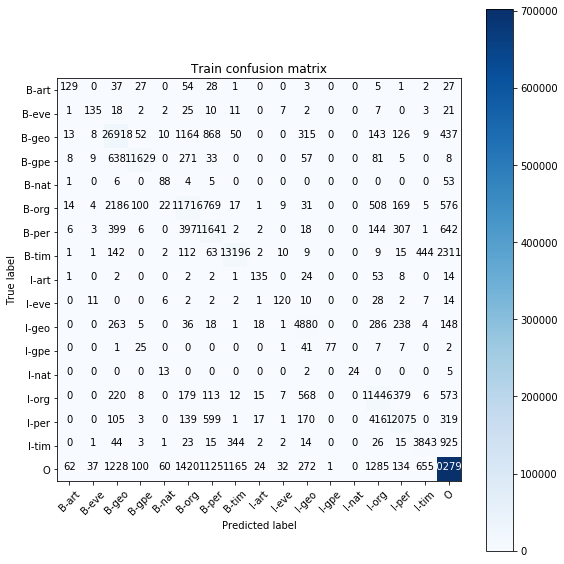

In [52]:
plot_confusion_matrix(cm_feat_train, list(pos_to_tag.values()), normalize=False, title='Train confusion matrix')


Confusion matrix, without normalization


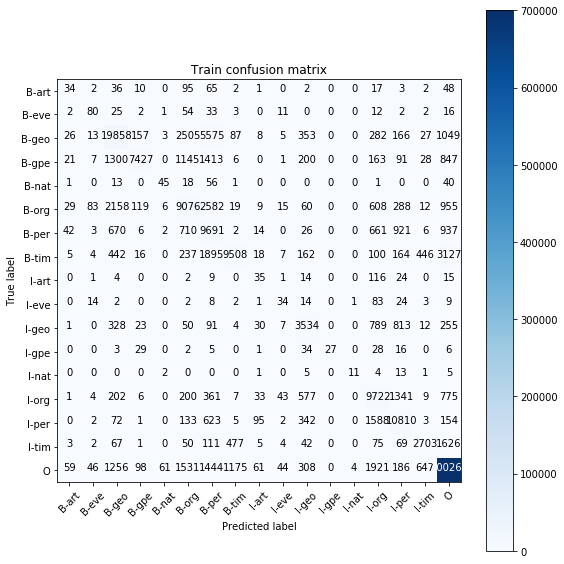

In [53]:
plot_confusion_matrix(cm_feat_test, list(pos_to_tag.values()), normalize=False, title='Train confusion matrix')


In [54]:
with open('fitted_models/Tiny_list.txt') as f:
    string_list = f.read().splitlines()

In [55]:
string_list

['The programmers from Barcelona might write a sentence without a spell checker.',
 'The programmers from Barchelona cannot write a sentence without a spell checker.',
 'Jack London went to Parris. Jack London went to Paris.',
 'Bill gates and Steve jobs never though Microsoft would become such a big company.',
 'Bill Gates and Steve Jobs never though Microsof would become such a big company.',
 'The president of U.S.A though they could win the war.',
 'The president of the United States of America though they could win the war.',
 'The king of Saudi Arabia wanted total control. Robin does not want to go to Saudi Arabia. Apple is a great company.',
 'I really love apples and oranges.',
 'Alice and Henry went to the Microsoft store to buy a new computer during their trip to New York.']

In [60]:
def string_list_decoder(string_list, perceptron):
    decoded=[]
    for p in string_list:
        new_seq = skseq.sequences.sequence.Sequence(x=p.split(), y=[int(0) for w in p.split()])
        decoded.append(perceptron.viterbi_decode(new_seq)[0].to_words(train_seq,
                                       only_tag_translation=True))
    return decoded

In [61]:
string_list_decoder(string_list, sp_base)

['The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker./O ',
 'The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker./O ',
 'Jack/B-per London/B-geo went/O to/O Parris./O Jack/B-per London/B-geo went/O to/O Paris./O ',
 'Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company./O ',
 'Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company./O ',
 'The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war./O ',
 'The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war./O ',
 'The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control./B-per Robin/I-per does/O not/O want/O to/O go/O to/O Saudi/O Arabia./O Apple/O is/O a/O great/O company./O ',
 'I/O really/O love/O apples/O and/

In [62]:
string_list_decoder(string_list, sp_feat)

['The/O programmers/O from/O Barcelona/B-per might/O write/O a/O sentence/O without/O a/O spell/O checker./O ',
 'The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker./O ',
 'Jack/B-per London/B-geo went/O to/O Parris./B-per Jack/I-per London/I-per went/O to/O Paris./B-geo ',
 'Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company./O ',
 'Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-per would/O become/O such/O a/O big/O company./O ',
 'The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war./O ',
 'The/O president/O of/O the/O United/B-geo States/I-geo of/O America/B-geo though/O they/O could/O win/O the/O war./O ',
 'The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control./O Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-org Arabia./I-org Apple/I-org is/O a/O great/O company./O ',
 'I/O really/O love